<a href="https://colab.research.google.com/github/Arisa-Laloo/CSE3120Project/blob/main/Arisa_Laloo_quadratic_band_wall_penalty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter notebook
---

## Example: Quadratic-band wall penalty with visualization

### Quadratic Band (Soft Wall)

$$
\phi(d) =
\begin{cases}
\frac{1}{2}(R - d)^2, & d \le R, \\
0, & d > R.
\end{cases}
$$
#### Behavior:
  - Smooth gradients
  - Creates a "buffer zone" around walls


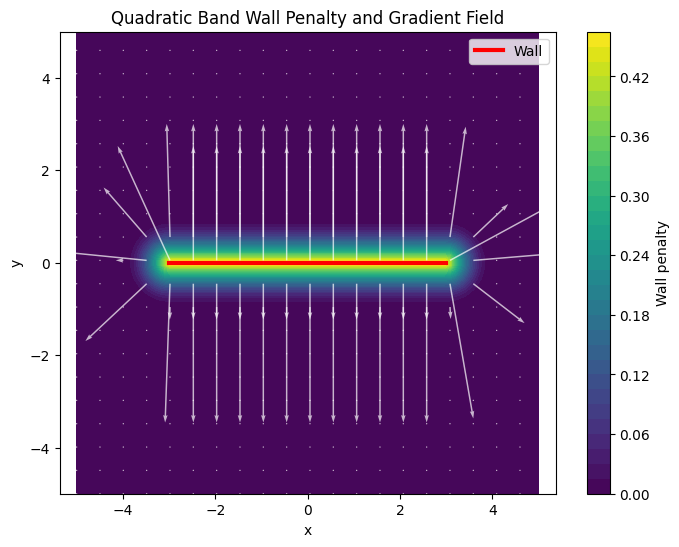

In [85]:
# Example: Quadratic-band wall penalty with visualization

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Geometry: distance to segment
# -------------------------------
def point_to_segment_distance(x, a, b):
    """
    Distance from point x to line segment [a, b]
    """
    v = b - a
    w = x - a
    vv = np.dot(v, v)

    if vv == 0.0:
        return np.linalg.norm(x - a)

    t = np.dot(w, v) / vv
    t = np.clip(t, 0.0, 1.0)
    q = a + t * v
    return np.linalg.norm(x - q)

# -------------------------------
# Wall penalty (quadratic band)
# -------------------------------
def wall_penalty(x, a, b, R):
    d = point_to_segment_distance(x, a, b)
    if d <= R:
        return 0.5 * (R - d)**2
    else:
        return 0.0

# -------------------------------
# Grid setup
# -------------------------------
xmin, xmax = -5, 5
ymin, ymax = -5, 5
N = 100

xs = np.linspace(xmin, xmax, N)
ys = np.linspace(ymin, ymax, N)
X, Y = np.meshgrid(xs, ys)

# Wall definition (horizontal wall)
a = np.array([-3.0, 0.0])
b = np.array([ 3.0, 0.0])
R = 1.0  # influence radius

# -------------------------------
# Evaluate cost field
# -------------------------------
C = np.zeros_like(X)

for i in range(N):
    for j in range(N):
        x = np.array([X[i, j], Y[i, j]])
        C[i, j] = wall_penalty(x, a, b, R)

# -------------------------------
# Numerical gradient
# -------------------------------
dCy, dCx = np.gradient(C, ys, xs)

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(8, 6))

# Cost contours
plt.contourf(X, Y, C, levels=30, cmap="viridis")
plt.colorbar(label="Wall penalty")

# Negative gradient (descent direction)
plt.quiver(
    X[::5, ::5], Y[::5, ::5],
    -dCx[::5, ::5], -dCy[::5, ::5],
    color="white", alpha=0.7
)

# Wall segment
plt.plot([a[0], b[0]], [a[1], b[1]], "r-", linewidth=3, label="Wall")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Band Wall Penalty and Gradient Field")
plt.axis("equal")
plt.legend()
plt.show()


## Floor plans to use

Plot floor-plan

In [86]:
def plot_floor_plan(walls, start=None, goal=None):
    plt.figure(figsize=(6, 6))
    for a, b in walls:
        a = np.array(a)
        b = np.array(b)
        plt.plot([a[0], b[0]], [a[1], b[1]], "k-", linewidth=2)

    if start is not None:
        plt.plot(start[0], start[1], "go", markersize=8, label="Start")

    if goal is not None:
        plt.plot(goal[0], goal[1], "ro", markersize=8, label="Goal")

    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.title("Assignment Floor Plan")
    plt.show()


### Selectable Floor Plan Layouts

In [87]:
# -----------------------------------------------------------------------------
# Floor plan options for the assignment
# -----------------------------------------------------------------------------

import numpy as np

def load_floor_plan(name="baseline"):
    """
    Load a predefined floor plan.

    Available options:
      - "baseline"  : corridor + corner (recommended default)
      - "zigzag"    : narrow zig-zag corridor (oscillation test)
      - "deadend"   : dead-end with escape (local minimum trap)
      - "symmetric" : symmetric obstacle trap (pathological case)

    Returns:
      walls : list of (a, b) line segments
      start : np.array shape (2,)
      goal  : np.array shape (2,)
    """

    if name == "baseline":
        walls = [
            # Outer boundary
            ([-5, -5], [ 5, -5]),
            ([ 5, -5], [ 5,  5]),
            ([ 5,  5], [-5,  5]),
            ([-5,  5], [-5, -5]),

            # Interior corridor
            ([-1, -5], [-1,  2]),
            ([-1,  2], [ 3,  2]),
            ([ 3,  2], [ 3, -2]),
        ]
        start = [-4.0, -4.0]
        goal  = [ 4.0,  4.0]

    elif name == "zigzag":
        walls = [
            # Outer boundary
            ([-6, -4], [ 6, -4]),
            ([ 6, -4], [ 6,  4]),
            ([ 6,  4], [-6,  4]),
            ([-6,  4], [-6, -4]),

            # Zig-zag corridor
            ([-4, -3], [-1, -3]),
            ([-1, -3], [-1,  0]),
            ([-1,  0], [ 2,  0]),
            ([ 2,  0], [ 2,  3]),
            ([ 2,  3], [ 5,  3]),
        ]
        start = [-5.0, -3.5]
        goal  = [ 5.0,  3.5]

    elif name == "deadend":
        walls = [
            # Outer boundary
            ([-6, -6], [ 6, -6]),
            ([ 6, -6], [ 6,  6]),
            ([ 6,  6], [-6,  6]),
            ([-6,  6], [-6, -6]),

            # Dead-end chamber
            ([-2, -6], [-2,  2]),
            ([-2,  2], [ 2,  2]),
            ([ 2,  2], [ 2, -2]),
            ([ 2, -2], [-4, -2]),
            ([-4, -2], [-4,  4]),
        ]
        start = [ 0.0, -5.0]
        goal  = [ 5.0,  5.0]

    elif name == "symmetric":
        walls = [
            # Outer boundary
            ([-6, -6], [ 6, -6]),
            ([ 6, -6], [ 6,  6]),
            ([ 6,  6], [-6,  6]),
            ([-6,  6], [-6, -6]),

            # Symmetric obstacles
            ([-2, -2], [-2,  2]),
            ([ 2, -2], [ 2,  2]),
            ([-2,  2], [ 2,  2]),
        ]
        start = [ 0.0, -5.0]
        goal  = [ 0.0,  5.0]

    else:
        raise ValueError(f"Unknown floor plan: {name}")

    # Convert to NumPy arrays
    walls = [(np.array(a, dtype=float), np.array(b, dtype=float)) for a, b in walls]
    start = np.array(start, dtype=float)
    goal  = np.array(goal, dtype=float)

    return walls, start, goal


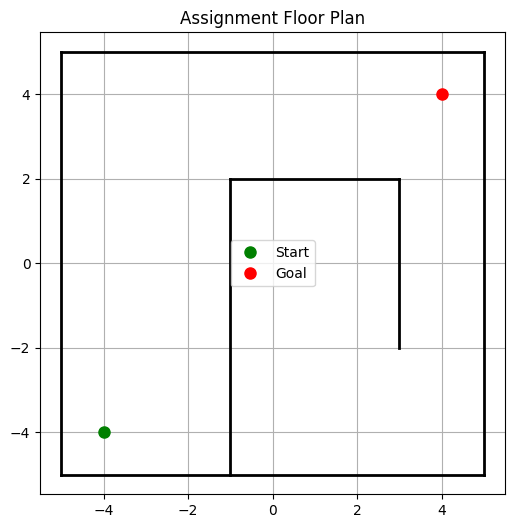

In [88]:
#@title Floor Plan Selection

floor_plan = "baseline" #@param ["baseline", "zigzag", "deadend", "symmetric"]


walls, start, goal = load_floor_plan(floor_plan)

plot_floor_plan(walls, start, goal)


# Assignment Implementation


In [89]:
# ----------------------------------------------------------
# Penalty function library (ϕ(d))
# ----------------------------------------------------------

def phi_quadratic_band(d, R):
    return 0.5 * (R - d)**2 if d <= R else 0.0

def phi_inverse_distance(d, R, eps=1e-3, p=1):
    if d > R:
        return 0.0
    return 1.0 / ((d + eps)**p) - 1.0 / ((R + eps)**p)

def phi_log_barrier(d, R, eps=1e-3):
    if d > R:
        return 0.0
    return -np.log((d + eps) / (R + eps))

def phi_quartic_band(d, R):
    # smoother far from wall, but still repulsive inside R
    return 0.25 * (R - d)**4 if d <= R else 0.0

def phi_gaussian(d, R, sigma=None):
    # very smooth, localized repulsion; good for narrow corridors (zigzag)
    if d > R:
        return 0.0
    if sigma is None:
        sigma = R / 3.0
    return np.exp(-0.5 * (d / sigma)**2)


In [90]:
# ----------------------------------------------------------
# Sum of wall penalties
# ----------------------------------------------------------

def C_walls(x, walls, phi, R, w=1.0, phi_kwargs=None):
    if phi_kwargs is None:
        phi_kwargs = {}

    dmin = np.inf
    for a, b in walls:
        d = point_to_segment_distance(x, a, b)
        if d < dmin:
            dmin = d

    return w * phi(dmin, R, **phi_kwargs)

In [91]:
# ----------------------------------------------------------
# Goal attraction term
# ----------------------------------------------------------

def C_goal(x, goal, k=1.0):
    diff = x - goal
    return 0.5 * k * np.dot(diff, diff)

In [92]:
# ----------------------------------------------------------
# Total cost function
# ----------------------------------------------------------

def C_total(x, goal, walls, phi, R,
            w_wall=1.0, k_goal=1.0, phi_kwargs=None):
    return C_goal(x, goal, k=k_goal) + \
           C_walls(x, walls, phi, R,
                   w=w_wall, phi_kwargs=phi_kwargs)

In [93]:
# ----------------------------------------------------------
# Numerical gradient
# ----------------------------------------------------------

def grad_C(x, C_func, h=1e-3):
    e1 = np.array([1.0, 0.0])
    e2 = np.array([0.0, 1.0])

    dCx = (C_func(x + h*e1) - C_func(x - h*e1)) / (2*h)
    dCy = (C_func(x + h*e2) - C_func(x - h*e2)) / (2*h)

    return np.array([dCx, dCy])

In [94]:
# ----------------------------------------------------------
# Gradient descent motion (with step clamp + light momentum + symmetry breaking)
# ----------------------------------------------------------

def run_descent(start, goal, walls, phi, R,
               w_wall=1.0, k_goal=1.0,
               alpha=0.03, max_iters=4000,
               tol=0.25, h=1e-3, phi_kwargs=None,
               max_step=0.15,      # caps step length (prevents zigzag overshoot)
               beta=0.7,           # momentum (0=none). Helps damp oscillations.
               stall_eps=1e-4,     # stall threshold
               stall_iters=25,     # how long before we consider "stuck"
               jitter=0.03,        # tiny symmetry-breaking / local-min escape
               jitter_seed=0):

    if phi_kwargs is None:
        phi_kwargs = {}

    rng = np.random.default_rng(jitter_seed)

    x = start.astype(float).copy()
    traj = [x.copy()]

    # momentum / velocity term
    v = np.zeros(2)

    def Cx(z):
        return C_total(z, goal, walls, phi, R,
                       w_wall=w_wall,
                       k_goal=k_goal,
                       phi_kwargs=phi_kwargs)

    stall_count = 0
    prev_x = x.copy()

    for _ in range(max_iters):
        # stop when close enough to goal
        if np.linalg.norm(x - goal) < tol:
            break

        g = grad_C(x, Cx, h=h)

        # momentum update (heavy-ball)
        v = beta * v - alpha * g
        step = v

        # cap step length to avoid overshoot/oscillation in tight corridors
        step_norm = np.linalg.norm(step)
        if step_norm > max_step:
            step = step * (max_step / step_norm)

        x = x + step
        traj.append(x.copy())

        # stall detection (no collision logic; just optimizer stagnation)
        if np.linalg.norm(x - prev_x) < stall_eps:
            stall_count += 1
        else:
            stall_count = 0
        prev_x = x.copy()

        # if stalled, add tiny sideways noise to break symmetry / escape flat local minima
        if stall_count >= stall_iters:
            # bias jitter sideways a bit (x-direction) to break symmetric traps
            x = x + np.array([rng.uniform(-jitter, jitter), rng.uniform(-0.2*jitter, 0.2*jitter)])
            traj.append(x.copy())
            stall_count = 0
            # reset momentum so we don't "slam" back
            v[:] = 0.0

    return np.array(traj)

In [95]:
# ----------------------------------------------------------
# Plot cost field + trajectory
# ----------------------------------------------------------

def plot_cost_and_path(walls, start, goal, phi, R,
                       w_wall=1.0, k_goal=1.0,
                       phi_kwargs=None,
                       xmin=-6, xmax=6,
                       ymin=-6, ymax=6,
                       N=160,
                       alpha=0.03, max_iters=4000, tol=0.25, h=1e-3,
                       max_step=0.15, beta=0.7,
                       stall_eps=1e-4, stall_iters=25,
                       jitter=0.03, jitter_seed=0, title=""):

    xs = np.linspace(xmin, xmax, N)
    ys = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(xs, ys)

    C = np.zeros_like(X)

    for i in range(N):
        for j in range(N):
            x = np.array([X[i, j], Y[i, j]])
            C[i, j] = C_total(x, goal, walls,
                              phi, R,
                              w_wall=w_wall,
                              k_goal=k_goal,
                              phi_kwargs=phi_kwargs)

    dCy, dCx = np.gradient(C, ys, xs)

    traj = run_descent(start, goal, walls,
                       phi, R,
                       w_wall=w_wall,
                       k_goal=k_goal,
                       alpha=alpha,
                       max_iters=max_iters,
                       tol=tol,
                       h=h,
                       phi_kwargs=phi_kwargs,
                       max_step=max_step,
                       beta=beta,
                       stall_eps=stall_eps,
                       stall_iters=stall_iters,
                       jitter=jitter,
                       jitter_seed=jitter_seed)

    plt.figure(figsize=(8,7))
    if title:
      plt.title(title)
    plt.contourf(X, Y, C, levels=40)
    plt.colorbar(label="Total cost")

    plt.quiver(X[::8, ::8], Y[::8, ::8],
               -dCx[::8, ::8], -dCy[::8, ::8],
               color="white", alpha=0.6)

    for a, b in walls:
        plt.plot([a[0], b[0]],
                 [a[1], b[1]], "k-", linewidth=2)

    plt.plot(start[0], start[1], "go", label="Start")
    plt.plot(goal[0], goal[1], "ro", label="Goal")
    plt.plot(traj[:,0], traj[:,1], "r-", label="Path")

    plt.axis("equal")
    plt.legend()
    plt.show()

    return traj

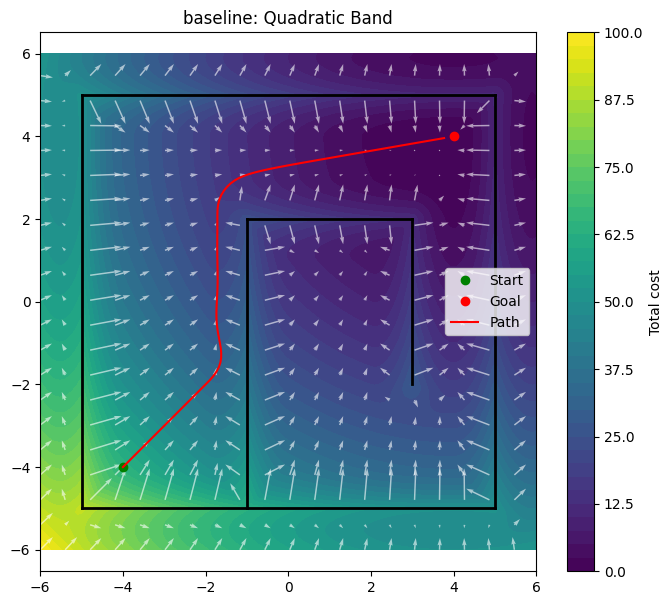

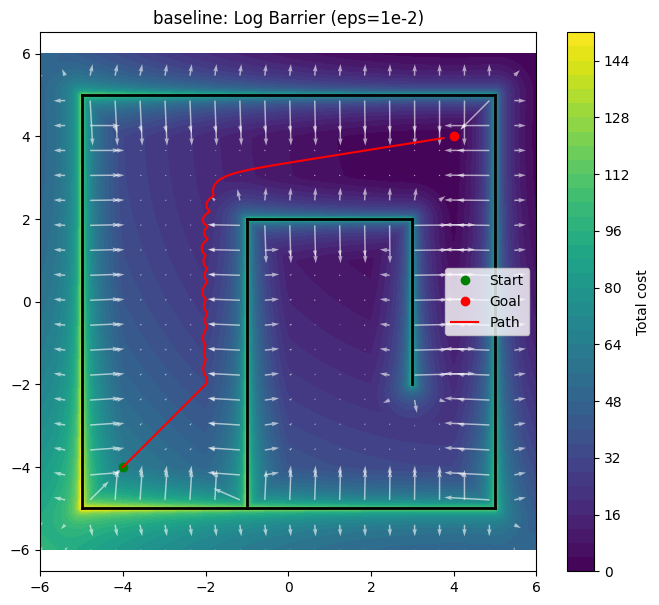

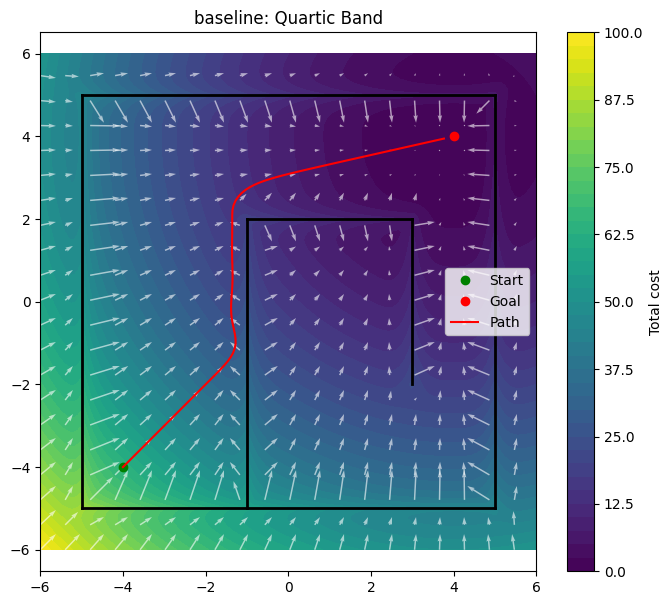

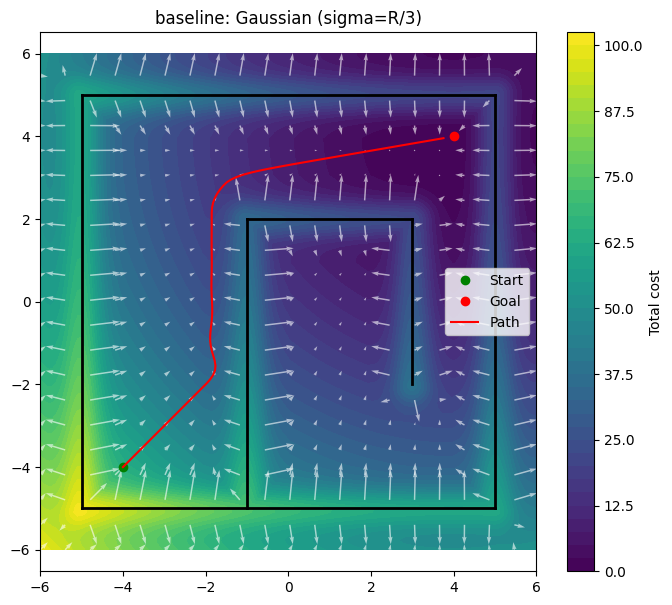

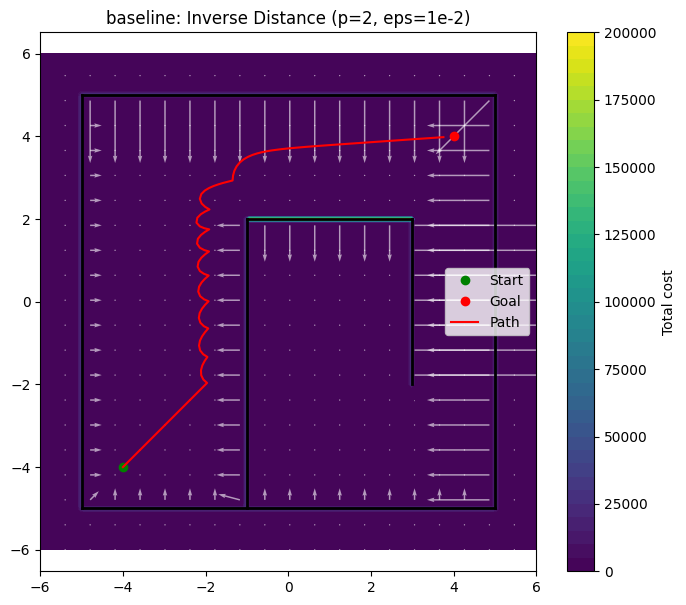

In [96]:
# Plot Paths
# ---------------------------------------
# Per-floor-plan parameter presets
# ---------------------------------------

if floor_plan == "zigzag":
   R = 1.1
   w_wall = 60.0
   alpha = 0.01
   max_step = 0.06
   beta = 0.8
   jitter = 0.03

elif floor_plan == "symmetric":
    # symmetry trap → allow symmetry breaking
    R = 1.0
    w_wall = 20.0
    alpha = 0.02
    max_step = 0.12
    beta = 0.7
    jitter = 0.03

else:
    # fallback
    R = 1.0
    w_wall = 20.0
    alpha = 0.02
    max_step = 0.12
    beta = 0.7
    jitter = 0.02

traj_quad = plot_cost_and_path(
    walls, start, goal,
    phi=phi_quadratic_band,
    R=R, w_wall=w_wall,
    alpha=alpha, max_step=max_step, beta=beta,
    jitter=jitter, jitter_seed=1,
    title=f"{floor_plan}: Quadratic Band"
)

traj_log = plot_cost_and_path(
    walls, start, goal,
    phi=phi_log_barrier,
    R=R, w_wall=w_wall,
    phi_kwargs={"eps": 1e-2},   # use 1e-2 for stability
    alpha=alpha, max_step=max_step, beta=beta,
    jitter=jitter, jitter_seed=2,
    title=f"{floor_plan}: Log Barrier (eps=1e-2)"
)

traj_quartic = plot_cost_and_path(
    walls, start, goal,
    phi=phi_quartic_band,
    R=R, w_wall=w_wall,
    alpha=alpha, max_step=max_step, beta=beta,
    jitter=jitter, jitter_seed=3,
    title=f"{floor_plan}: Quartic Band"
)

traj_gauss = plot_cost_and_path(
    walls, start, goal,
    phi=phi_gaussian,
    R=R, w_wall=w_wall,
    phi_kwargs={"sigma": R/3},
    alpha=alpha, max_step=max_step, beta=beta,
    jitter=jitter, jitter_seed=4,
    title=f"{floor_plan}: Gaussian (sigma=R/3)"
)

traj_inv = plot_cost_and_path(
    walls, start, goal,
    phi=phi_inverse_distance,
    R=R, w_wall=w_wall,
    phi_kwargs={"eps": 1e-2, "p": 2},  # stronger repulsion, stable eps
    alpha=alpha, max_step=max_step, beta=beta,
    jitter=jitter, jitter_seed=5,
    title=f"{floor_plan}: Inverse Distance (p=2, eps=1e-2)"
)